# Integration
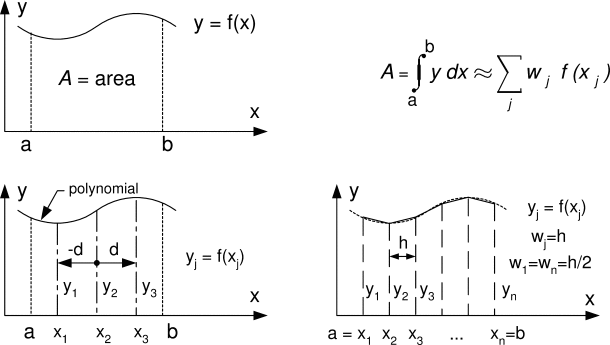

## Trapezoidal Rule

$$ I (a,b) = \int_a^b f(x)\ dx $$
Dividing the interval $(a,b)$ into $N$ slices or steps, we get
* width of each slice, $h=(b-a)/N$
* For a $k$th slice,
    - the right-hand side falls at $a+kh$
    - the left-hand side falls at $a+(k-1)h$
    - and the area is:
         $$ A_k = \frac{1}{2}h[f(a+(k-1)h)+f(a+kh)] $$

The total integral is the sum of all slices between $(a,b)$. This is the **trapezoidal rule**.

$$ I(a,b) \simeq \sum_{k=1}^N A_k = h\left[\frac{1}{2}f(a)+\frac{1}{2}f(b)+\sum_{k=1}^{N-1}f(a+kh)\right]$$

### Problem 1: Integrate $x^4 - 2x + 1$ from $x=0$ to $x=2$

In [28]:
# Write a program to calculate integration for the above polynomial using the trapezoidal method (the formula above)
N = 10
a = 0
b = 2
h = (b-a)/N
true_val = 4.4

def poly(x):
  return x**4 - 2*x + 1

s = 0
for i in range(1,N):
  s += poly(a+i*h)

integration = h*(0.5*poly(a)+0.5*poly(b) + s)
print(r"I(a,b) = %f"%(integration))
print(r"% error =",abs(integration-true_val)/true_val*100,"%")

I(a,b) = 4.506560
% error = 2.4218181818181814 %


Now solve the above integration by hand. Do the results match? If not, what is the remedy?

In [ ]:
# plot the increase in error (and relative error) from the true value with increasing number of slices
import numpy as np
from matplotlib import pyplot as plt

N = np.array(np.arange(10,200,2))
H = (b-a)/N

for n,h in zip(N,H):
    s = 0
    for i in range(1,n):
      s += poly(a+i*h)
    integration = h*(0.5*poly(a)+0.5*poly(b) + s)
    
    plt.plot(n,integration,ls='',marker='o',ms=4,color='C0')
    print(n,integration)

plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$I(a,b)$')
plt.show()

## Simpson's Rule -- high accuracy and speed
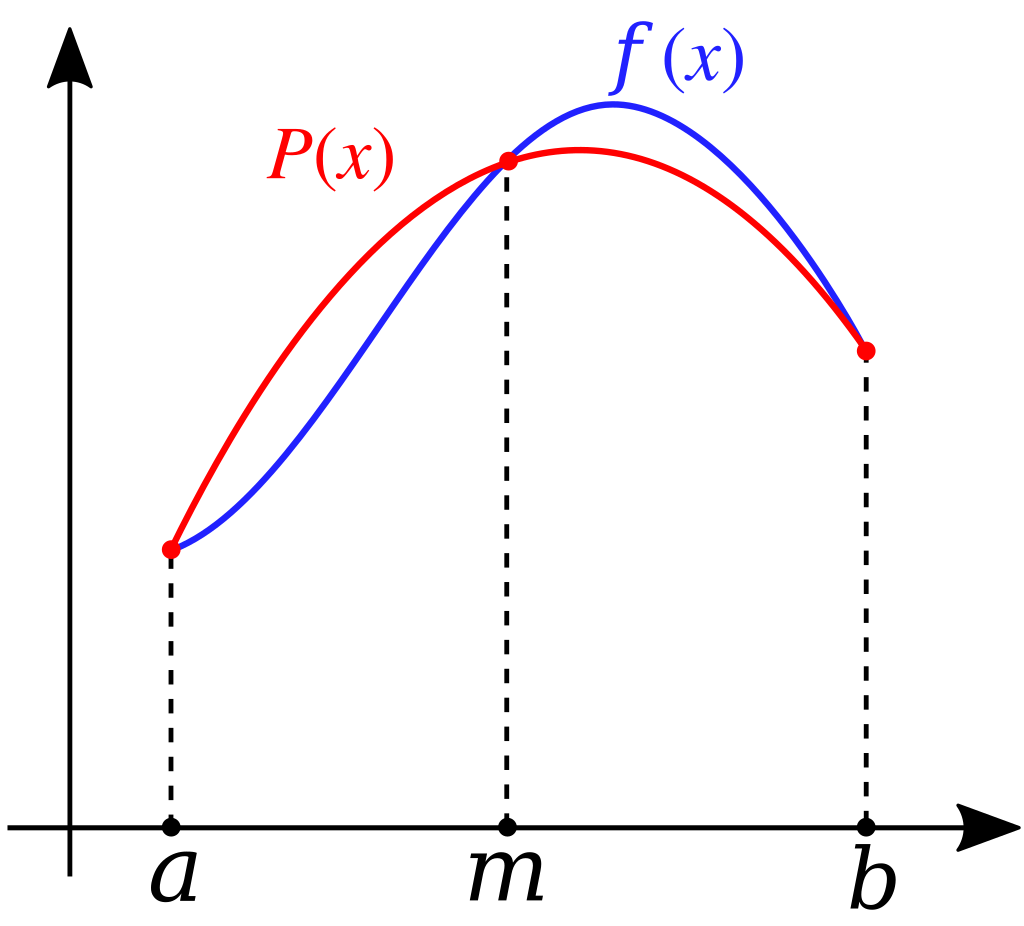

As before, we divide the $x$ range into slices of width $h$. Consider three points: $-h$, $0$ and $+h$. A quadratic $Ax^2+Bx+C$ that passes through all three points can be found as:
* $f(-h) = Ah^2 - Bh +C$
* $f(0) = C$
* $f(h) = Ah^2+Bh+C$

Solving the above three equations simultaneously gives us:
$$
\begin{align}
A =& \frac{1}{h^2}\left[\frac{1}{2}f(-h)-f(0)+\frac{1}{2}f(h)\right] \\
B =& \frac{1}{2h}[f(h)-f(-h)] \\
C =& f(0)
\end{align}
$$

The area under the curve $f(x)$ from $-h$ to $+h$ is approximately the same as the area under the quadratic! Can you integrate the quadratic analytically and find out what you should expect?

$$ \int_{-h}^h (Ax^2+Bx+C)\ dx = \frac{1}{3}h[f(-h)+4f(0)+f(h)] $$

As before, we can divide $(a,b)$ into slices of width $h$. Then the entire integral is
$$ I(a,b) \simeq \frac{1}{3}h \left[f(a) + f(b) + 4\sum_{\substack{k\ {\rm odd}\\ 1...N-1}}f(a+kh) + 2\sum_{\substack{k\ {\rm even}\\ 2...N-2}}f(a+kh)\right] $$

In [29]:
# Write a program to calculate integration for the above polynomial using the Simpson's method (the formula above)
N = 10
a = 0
b = 2
h = (b-a)/N
true_val = 4.4

def poly(x):
  return x**4 - 2*x + 1

s_even = 0
# adding even terms
for i in range(1,N,2):
  s_even += poly(a+i*h)
s_odd = 0
# adding odd terms
for i in range(2,N,2):
  s_odd += poly(a+i*h)

integration = (h/3.)*(poly(a) + poly(b) + 4*s_even + 2*s_odd)
print("I(a,b) = %f"%integration)
print("% error = ",abs(integration-true_val)/true_val*100,"%")

I(a,b) = 4.400427
% error =  0.009696969696972665 %


Is this already better than trapezoidal rule? Test the accuracy of the method for larger N.

10 4.400426666666667
12 4.4002057613168715
14 4.400111064834096
16 4.400065104166666
18 4.400040644210739
20 4.400026666666667
22 4.400018213692144
24 4.400012860082303
26 4.400009336741245
28 4.40000694155213
30 4.400005267489712
32 4.400004069010416
34 4.400003192809791
36 4.40000254026317
38 4.400002046229437
40 4.400001666666668
42 4.40000137117079
44 4.40000113835576
46 4.400000952922076
48 4.400000803755143
50 4.4000006826666676
52 4.40000058354633
54 4.4000005017803785
56 4.400000433847007
58 4.4000003770307226
60 4.4000003292181065
62 4.400000288749975
64 4.4000002543131504
66 4.400000224860397
68 4.400000199550611
70 4.400000177703733
72 4.4000001587664475
74 4.400000142285892
76 4.400000127889339
78 4.400000115268409
80 4.400000104166668
82 4.400000094369861
84 4.4000000856981725
86 4.400000078000055
88 4.400000071147237
90 4.4000000650307385
92 4.400000059557629
94 4.40000005464838
96 4.400000050234696
98 4.400000046257738
100 4.400000042666668
102 4.400000039417405
104 4.40

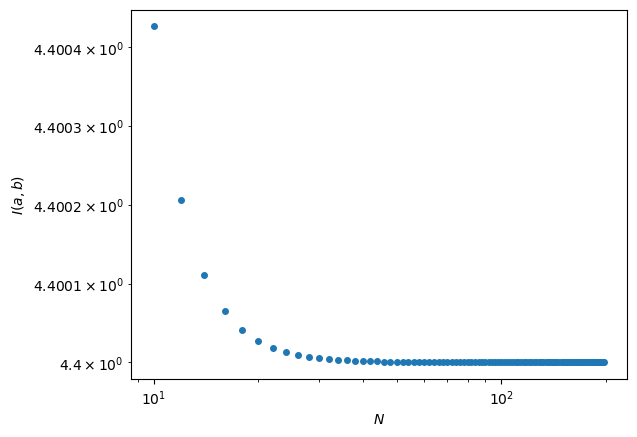

In [32]:
# plot the increase in error (and relative error) from the true value with increasing number of slices
import numpy as np
from matplotlib import pyplot as plt

N = np.array(np.arange(10,200,2))
H = (b-a)/N

for n,h in zip(N,H):
    s_even = 0
    # adding even terms
    for i in range(1,n,2):
      s_even += poly(a+i*h)
    s_odd = 0
    # adding odd terms
    for i in range(2,n,2):
      s_odd += poly(a+i*h)
    integration = (h/3.)*(poly(a) + poly(b) + 4*s_even + 2*s_odd)
    
    plt.plot(n,integration,ls='',marker='o',ms=4,color='C0')
    print(n,integration)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$I(a,b)$')
plt.show()

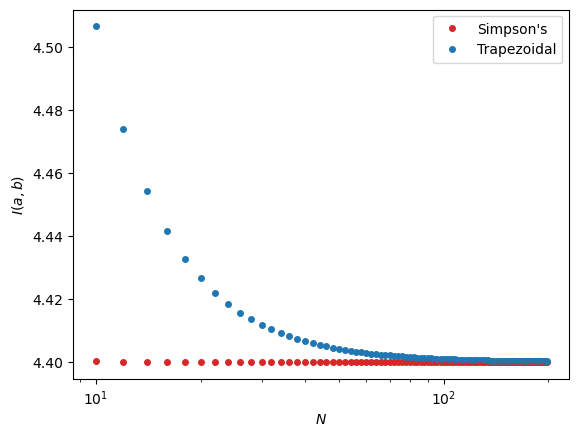

In [38]:
import numpy as np
from matplotlib import pyplot as plt

N = np.array(np.arange(10,200,2))
H = (b-a)/N

c = 0 # for printing the legend only once

for n,h in zip(N,H):
    # Simpson's Rule
    s_even = 0
    # adding even terms
    for i in range(1,n,2):
      s_even += poly(a+i*h)
    s_odd = 0
    # adding odd terms
    for i in range(2,n,2):
      s_odd += poly(a+i*h)
    integration_simp = (h/3.)*(poly(a) + poly(b) + 4*s_even + 2*s_odd)

    # Trapezoidal Rule
    s = 0
    for i in range(1,n):
      s += poly(a+i*h)
    integration_trap = h*(0.5*poly(a)+0.5*poly(b) + s)

    if c==0:
        plt.plot(n,integration_simp,ls='',marker='o',ms=4,color='C3',label="Simpson\'s")
        plt.plot(n,integration_trap,ls='',marker='o',ms=4,color='C0',label="Trapezoidal")
        c = 1
    else:
        plt.plot(n,integration_simp,ls='',marker='o',ms=4,color='C3')
        plt.plot(n,integration_trap,ls='',marker='o',ms=4,color='C0')
    
plt.xscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$I(a,b)$')
plt.legend()
plt.show()

# Try it yourself

### Total 4 marks

Download the "velocities.txt" file from the "data_files" directory in the Github class repository. This file has two columns of numbers, the first representing time in seconds and the second the $x$-velocity in m/s of a particle, measured once every second from time $t=0$ to $t=100$. Write a program to do the following:
* Read in the data and use the trapezoidal rule to calculate the approximate distance travelled by the particle in the $x$ direction as a function of time.
* Draw a graph that shows, on the same plot, both the original velocity curve and the distance travelled as a function of time.